In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump

from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression   
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import PrecisionRecallDisplay
# from sklearn.metrics import RocCurveDisplay


In [2]:
# import sys
# if not sys.warnoptions:
#     import warnings
#     warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('BCW_dataset.csv')

In [4]:
# DATA MEAN

# X = data.iloc[:, 1:-1]
# y = data[['y']].replace('B', 0).replace('M', 1)
# X = X.drop(['x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se', 'x.smoothness_se', 'x.compactness_se', 
#               'x.concavity_se', 'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se'], axis=1)
# X = X.drop(['x.perimeter_mean', 'x.area_mean', 'x.perimeter_worst', 'x.area_worst'], axis=1)

# # data split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# X_array = np.array(X_train)
# y_array = np.array(y_train)

# print('target :', y.shape)
# print('features :', X.shape)
# print('train_target :', y_array.shape)
# print('train_features :', X_array.shape)
# print('test_target :', y_test.shape)
# print('test_features :', X_test.shape)

target : (569, 1)
features : (569, 16)
train_target : (398, 1)
train_features : (398, 16)
test_target : (171, 1)
test_features : (171, 16)


In [59]:
# DATA WORST

X = data.iloc[:, 21:-1]
y = data[['y']].replace('B', 0).replace('M', 1)
# X = X.drop(['x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se', 'x.smoothness_se', 'x.compactness_se', 
#               'x.concavity_se', 'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se'], axis=1)
# X = X.drop(['x.perimeter_mean', 'x.area_mean', 'x.perimeter_worst', 'x.area_worst'], axis=1)

# X = X.drop(['x.perimeter_mean', 'x.area_mean'], axis=1)
X = X.drop(['x.perimeter_worst', 'x.area_worst'], axis=1)


# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_array = np.array(X_train)
y_array = np.array(y_train)

print('target :', y.shape)
print('features :', X.shape)
print('train_target :', y_array.shape)
print('train_features :', X_array.shape)
print('test_target :', y_test.shape)
print('test_features :', X_test.shape)

target : (569, 1)
features : (569, 8)
train_target : (398, 1)
train_features : (398, 8)
test_target : (171, 1)
test_features : (171, 8)


In [ ]:
# DATA BEST SELECTION

In [60]:
def classification_metrics_function(y_test, y_pred, estimator, name):
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)             
    
    print('\nClassification metrics:')
    print(f'{name}_accuracy_score : {accuracy:.4f}')  
    print(f'{name}_f1_score : {f1:.4f}')   
    print(f'{name}_precision_score : {precision:.4f}')
    print(f'{name}_recall_score : {recall:.4f}')
    
    # confusion matrix
    print(f'\n{name}_cnf_matrix')
    cnf_matrix = confusion_matrix (y_test, y_pred, normalize='all')
    print(cnf_matrix)
    ax = plt.subplot()
    sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)
    
    # precision-recall curve
    display = PrecisionRecallDisplay.from_estimator(estimator, X_test, y_test, name=name)  
    _ = display.ax_.set_title("2-class Precision-Recall curve")    ################################################
    
#     # ROC curve
#     rfc_disp = RocCurveDisplay.from_estimator(log_regression, X_test, y_test, name=name)
#     # svc_disp.plot(ax=ax, alpha=0.8)
#     _ = display.ax_.set_title("ROC curve")
    
    return accuracy, f1, precision, recall, cnf_matrix

# Logistic Regression

In [61]:
# log_regression model training
log_regression = LogisticRegression()
log_regression.fit(X_array, y_array.ravel())

# save the model
dump(log_regression, 'log_r.joblib')

['log_r.joblib']

C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\MyWork\AppData\Local\Temp\ipykernel_31976\2066608001.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, y_pred_proba, c=y_test, cmap='inferno')   ############################


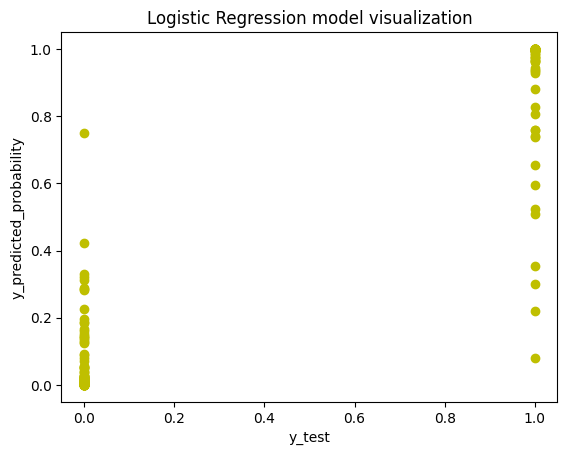

C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


LogR.classes : [0 1]
LogR.coef :
 [[1.10111871 0.21317974 0.45480269 1.64514487 2.22038642 0.70254082
  0.80677474 0.2382999 ]]
LogR.intercept : [-25.54853307]

Metrics of the regression model:
coefficient of determination : 0.9708
mean_absolute_error : 0.0292
mean_squared_error : 0.0292
root mean_squared_error : 0.1710

Classification metrics:
LogR_accuracy_score : 0.9708
LogR_f1_score : 0.9612
LogR_precision_score : 0.9841
LogR_recall_score : 0.9394

LogR_cnf_matrix
[[0.60818713 0.00584795]
 [0.02339181 0.3625731 ]]


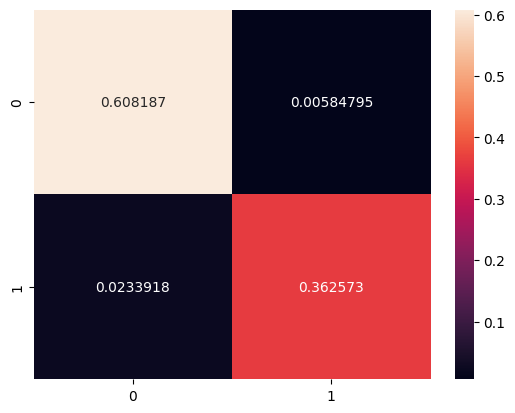

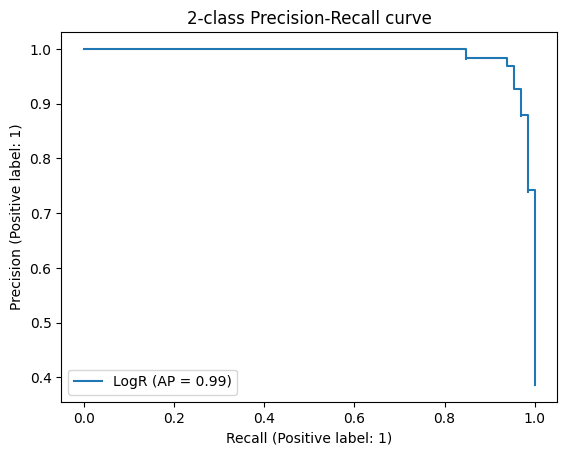

In [62]:
# prediction
y_pred = log_regression.predict(X_test)
y_pred_proba = log_regression.predict_proba(X_test)[:,1]

# model visualisation
plt.scatter(y_test, y_pred_proba, c=y_test, cmap='inferno')   ############################
plt.xlabel('y_test')
plt.ylabel('y_predicted_probability')
plt.title('Logistic Regression model visualization')
plt.show()

# regression function
print('LogR.classes :', log_regression.classes_)
# print('LogR.priors :', log_regression.priors_)     ######################################################
print('LogR.coef :\n', log_regression.coef_)
print('LogR.intercept :', log_regression.intercept_)

# regression metrics    ##############################################################################################
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('\nMetrics of the regression model:')
print(f'coefficient of determination : {log_regression.score(X_test, y_test):.4f}')
print(f'mean_absolute_error : {mae:.4f}')
print(f'mean_squared_error : {mse:.4f}')
print(f'root mean_squared_error : {rmse:.4f}')

# classification metrics
# print('\nMetrics of the classification:')
LogR_accuracy,LogR_f1,LogR_precision,LogR_recall,LogR_cnf_matrix=classification_metrics_function(y_test,y_pred,log_regression,'LogR')


# LDA - LinearDiscriminantAnalysis

In [63]:
# LDA model training
lda = LinearDiscriminantAnalysis(solver="eigen", shrinkage=None)
lda.fit(X_array, y_array.ravel())
transform_lda = lda.fit_transform(X_array,  y_array.ravel())

# save the model
dump(lda, 'lda.joblib')

['lda.joblib']

C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


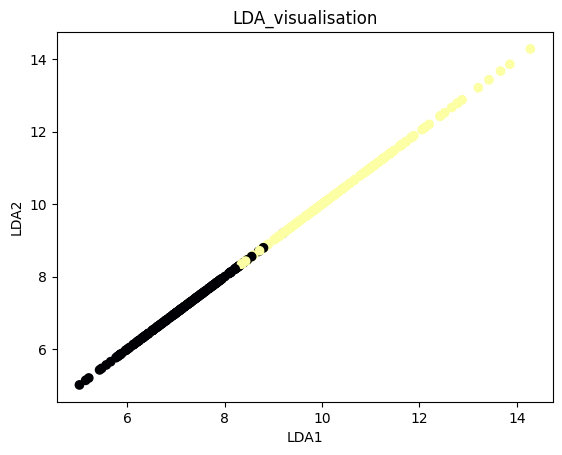

C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


lda.classes : [0 1]
lda.priors : [0.63316583 0.36683417]
lda.coef :
 [[ 0.7129136   0.18140025 23.05362369 -9.25486923  4.52956161 30.00640075
  11.60934739 30.04290625]]
lda.intercept : [-29.34978328]

Classification metrics:
LDA_accuracy_score : 0.9883
LDA_f1_score : 0.9846
LDA_precision_score : 1.0000
LDA_recall_score : 0.9697

LDA_cnf_matrix
[[0.61403509 0.        ]
 [0.01169591 0.37426901]]


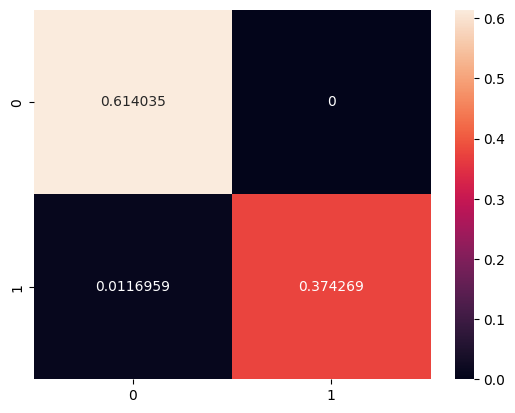

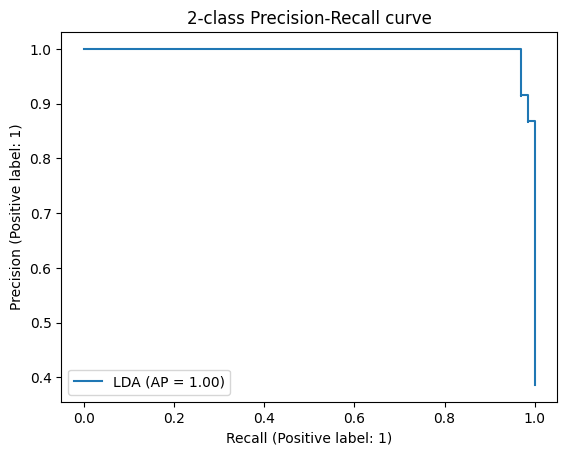

In [64]:
# prediction
y_pred = lda.predict(X_test)

# model visualisation
plt.scatter(transform_lda[:,0], transform_lda[:,0], c=y_array, cmap='inferno')  ############### y_array
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('LDA_visualisation')
plt.show()

# discriminating function
print('lda.classes :', lda.classes_)
print('lda.priors :', lda.priors_)
print('lda.coef :\n', lda.coef_)
print('lda.intercept :', lda.intercept_)

# classification metrics
LDA_accuracy, LDA_f1, LDA_precision, LDA_recall, LDA_cnf_matrix = classification_metrics_function(y_test, y_pred, lda, 'LDA')

# QDA - QuadraticDiscriminantAnalysis

In [65]:
# QDA model training

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_array, y_array.ravel())
qda_decision_function = qda.decision_function(X_array).reshape(-1,1)

# save the model
dump(qda, 'qda.joblib')

['qda.joblib']

C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  warnings.warn(


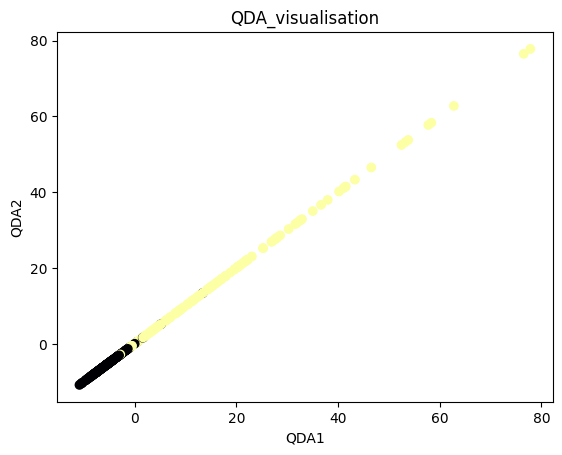

C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  warnings.warn(


lda.classes : [0 1]
lda.priors : [0.63316583 0.36683417]

Classification metrics:
QDA_accuracy_score : 0.9474
QDA_f1_score : 0.9323
QDA_precision_score : 0.9254
QDA_recall_score : 0.9394

QDA_cnf_matrix
[[0.58479532 0.02923977]
 [0.02339181 0.3625731 ]]


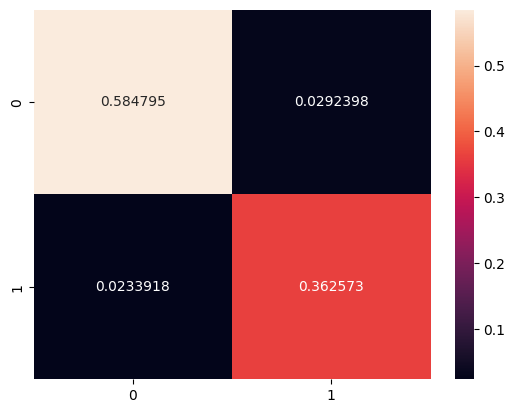

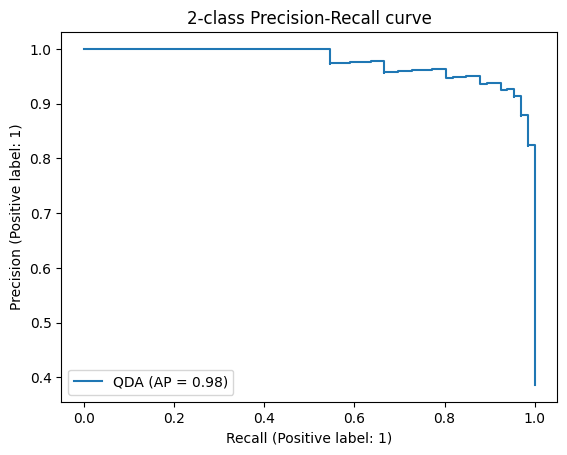

In [66]:
# prediction
y_pred = qda.predict(X_test)

# model visualisation
plt.scatter(qda_decision_function[:,0], qda_decision_function[:,0], c=y_array, cmap='inferno')   #### y_array
plt.xlabel('QDA1')
plt.ylabel('QDA2')
plt.title('QDA_visualisation')
plt.show()

print('lda.classes :', qda.classes_)
print('lda.priors :', qda.priors_)
# print('lda.coef :\n', qda.coef_)
# print('lda.intercept :', qda.intercept_)

# classification metrics
QDA_accuracy, QDA_f1, QDA_precision, QDA_recall, QDA_cnf_matrix = classification_metrics_function(y_test, y_pred, qda, 'QDA')

# SVM - Support Vector Machines

In [67]:
# Linear Support Vector Classification model training
svc = svm.LinearSVC()
svc.fit(X_array, y_train)

# save the model
dump(svc, 'svc.joblib')

C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['svc.joblib']

C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


svc.classes : [0 1]
svc.coef :
 [[ 0.20205855  0.05015992  0.00358716  0.53640584  1.08247911  0.86435205
   0.04037105 -0.19271325]]
svc.intercept : [-5.05035485]

Classification metrics:
SVC_accuracy_score : 0.9532
SVC_f1_score : 0.9412
SVC_precision_score : 0.9143
SVC_recall_score : 0.9697

SVC_cnf_matrix
[[0.57894737 0.03508772]
 [0.01169591 0.37426901]]


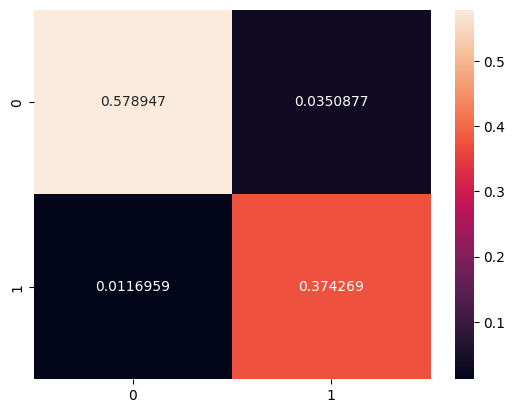

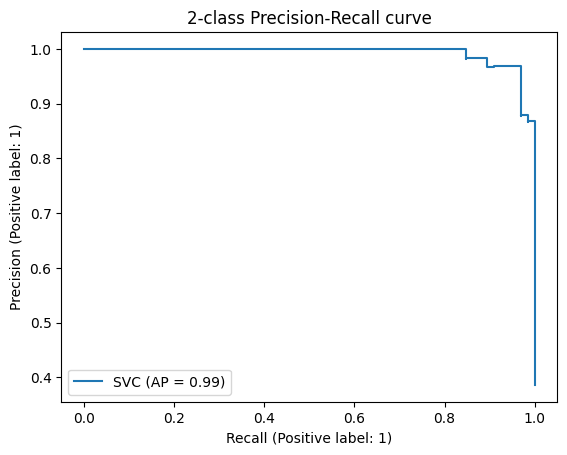

In [68]:

############### model class interseption ......#####################
print('svc.classes :', svc.classes_)
# print('svc.priors :', svc.priors_)
print('svc.coef :\n', svc.coef_)
print('svc.intercept :', svc.intercept_)

# prediction
y_pred = svc.predict(X_test)
# y_pred_proba = svc.predict_proba(X_test)[:,1]   ### no

# classification metrics
svc_accuracy,svc_f1,svc_precision,svc_recall,svc_cnf_matrix=classification_metrics_function(y_test,y_pred,svc,'SVC')

# GNB - Gaussian Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

# GNB model training
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# save the model
dump(gnb, 'gnb.joblib')

C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['gnb.joblib']

gnb.classes : [0 1]


C:\Users\MyWork\AppData\Local\Temp\ipykernel_31976\3085842247.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, y_pred_proba, c=y_test, cmap='inferno')


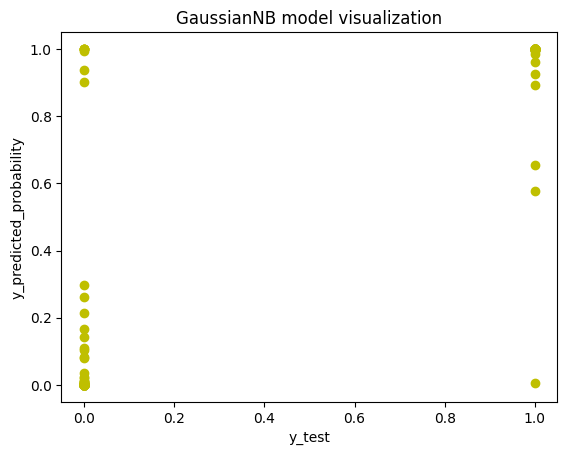


Classification metrics:
GNB_accuracy_score : 0.9474
GNB_f1_score : 0.9353
GNB_precision_score : 0.8904
GNB_recall_score : 0.9848

GNB_cnf_matrix
[[0.56725146 0.04678363]
 [0.00584795 0.38011696]]


array([8.91645311e-01, 1.62817523e-04, 1.08967319e-02, 1.18332985e-05,
       9.99836847e-01, 7.55856329e-06, 8.53907365e-07, 4.21823590e-07,
       2.23167474e-04, 9.99491188e-01, 1.00000000e+00, 2.61768033e-01,
       8.92859453e-03, 1.36016970e-04, 9.99819937e-01, 9.99999449e-01,
       1.50461182e-04, 1.00000000e+00, 1.00000000e+00, 8.85613114e-06,
       1.00000000e+00, 9.99999997e-01, 9.99908666e-01, 1.00000000e+00,
       1.05169952e-01, 7.56246582e-06, 9.99999863e-01, 7.95702811e-02,
       4.18632226e-06, 2.12303031e-02, 1.00000000e+00, 2.05910001e-06,
       1.00035571e-05, 9.99979463e-01, 1.05841576e-05, 1.71482965e-05,
       5.93253203e-05, 6.20915361e-05, 7.11148636e-03, 1.51174115e-06,
       1.00000000e+00, 1.66421829e-04, 5.81345238e-07, 7.11096435e-04,
       6.65857964e-05, 2.27134045e-05, 9.95901633e-01, 1.60392987e-05,
       1.00000000e+00, 8.86520429e-05, 9.84462955e-01, 2.83664774e-03,
       2.95949922e-01, 2.28826336e-02, 1.00000000e+00, 1.00000000e+00,
      

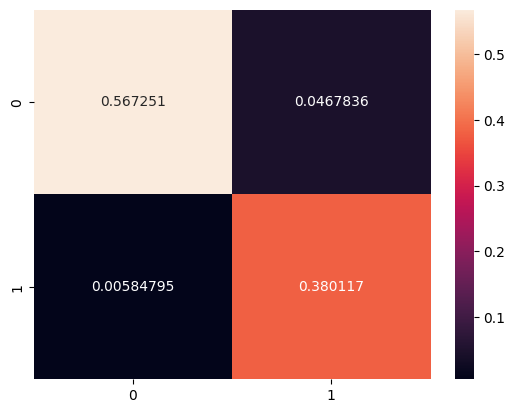

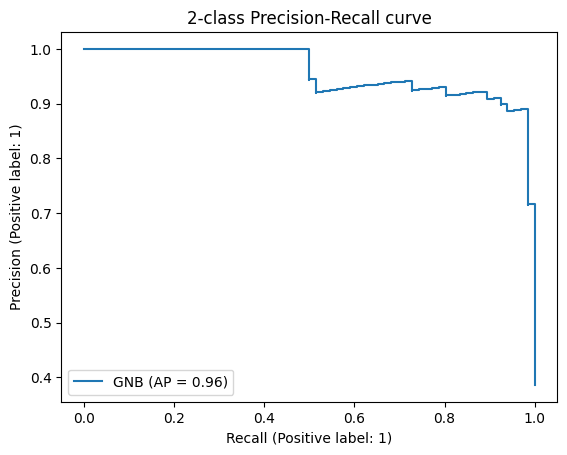

In [70]:
print('gnb.classes :', gnb.classes_)
# print('gnb.priors :', gnb.priors_)
# print('gnb.coef :\n', gnb.coef_)
# print('gnb.intercept :', gnb.intercept_)

# prediction
y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)[:,1]  

# model visualisation
plt.scatter(y_test, y_pred_proba, c=y_test, cmap='inferno') 
plt.xlabel('y_test')
plt.ylabel('y_predicted_probability')
plt.title('GaussianNB model visualization')
plt.show()

# classification metrics
gnb_accuracy,gnb_f1,gnb_precision,gnb_recall,gnb_cnf_matrix=classification_metrics_function(y_test,y_pred,gnb,'GNB')

y_pred_proba